In [1]:
from os.path import dirname, join, pardir
from cobra.io import read_sbml_model
from dfba import DfbaModel, ExchangeFlux, KineticVariable

Start by setting a minimum biomass and making resveratrol the objective rxn.

In [4]:
model = read_sbml_model("../data/models/yeast8_resv_glc.xml")

In [5]:
biomass_objective = model.optimize().objective_value

In [6]:
model.reactions.GROWTH.lower_bound = biomass_objective*0.5 #set the minimum biomass to be 50% of the flux
print("Biomass bounds now are:", model.reactions.GROWTH.bounds)

Biomass bounds now are: (0.040964056273108514, 1000.0)


In [7]:
model.objective = model.reactions.VVVST1
model.optimize()

,fluxes,reduced_costs
D_LACDcm,0.000000,8.309738e-16
D_LACDm,0.000000,1.387779e-17
BTDD_RR,0.000000,0.000000e+00
L_LACD2cm,0.000000,-1.387779e-17
13BETGLUSYN,0.030662,0.000000e+00
...,...,...
r_4710,0.000000,0.000000e+00
HA-TAL,0.155247,2.997602e-15
AT-4CL1,0.155247,4.440892e-16
VVVST1,0.155247,3.219647e-15


In [8]:
%%capture --no-display
model.solver = "glpk"
dfba_model = DfbaModel(model)

In [9]:
# Definign kinetic variables
X = KineticVariable("Biomass")
Glc = KineticVariable("Glucose")
Res = KineticVariable("Resveratrol")
Oxy = KineticVariable("Oxygen")

dfba_model.add_kinetic_variables([X, Glc, Res, Oxy])

In [10]:
# Exchange fluxes
mu = ExchangeFlux("GROWTH")
v_G = ExchangeFlux("EX_glc__D_e")
v_O = ExchangeFlux("EX_o2_e")
v_R = ExchangeFlux("VVVST1")
                   
                   
dfba_model.add_exchange_fluxes([mu, v_G, v_O, v_R])

In [11]:
dfba_model.add_rhs_expression("Biomass", mu * X)
dfba_model.add_rhs_expression("Glucose", v_G * 180.1559/1000 * X) # v_G [mmol gDW^-1 h^-1] * 0.18 g/mmol * gDW/L
dfba_model.add_rhs_expression("Oxygen", 0) # O2 is kept constant
dfba_model.add_rhs_expression("Resveratrol", v_R * 228.25 /1000 * X) #Resveratrol molecular weight.

In [12]:
#Lower and upper bound expressions
vmax_o2 = 15 # [mmol gDW^-1 h^-1]
Ko = 0.024 # mmol/L O2 Michaelis-Mentent constant
dfba_model.add_exchange_flux_lb("EX_o2_e", vmax_o2 * (Oxy / (Ko + Oxy)), Oxy)

In [19]:
# Initial conditions
dfba_model.add_initial_conditions(
    {
        "Biomass": 0.01, # (gDW/L)
        "Glucose": 4, # (g/L)
        "Oxygen": 4,  # (mmol/L)
        "Resveratrol": 0.0,  # (g/L)
    }
)
concentrations, trajectories = dfba_model.simulate(0.0, 30.0, 0.1, ["EX_glc__D_e", "EX_o2_e", "VVVST1"]) 
# simulate model across interval t = [0.0,16.0](hours) with outputs for plotting, every 0.1h

clang-11: warning: -Wl,-export_dynamic: 'linker' input unused [-Wunused-command-line-argument]
ld: warning: -pie being ignored. It is only used when linking a main executable




Final Run Statistics: 

Number of steps                    = 0
Number of residual evaluations     = 0
Number of Jacobian evaluations     = 20
Number of nonlinear iterations     = 0
Number of error test failures      = 0
Number of nonlinear conv. failures = 0
Number of root fn. evaluations     = 0

Total simulation time was 4.52248 seconds



In [14]:
from dfba.plot.matplotlib import *

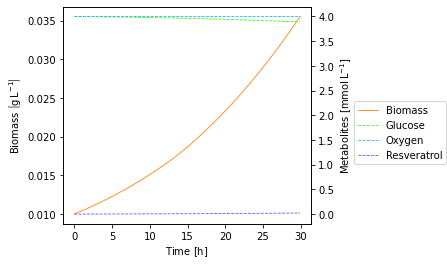

In [20]:
plot_concentrations(concentrations)

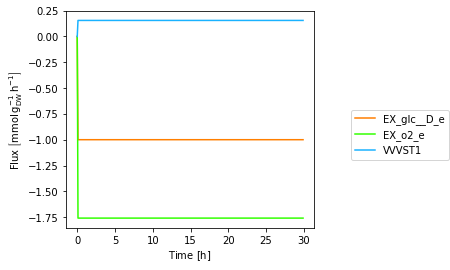

In [21]:
plot_trajectories(trajectories)

In [22]:
dfba_model.add_initial_conditions(
    {
        "Biomass": 0.01, # (gDW/L)
        "Glucose": 10, # (g/L)
        "Oxygen": 4,  # (mmol/L)
        "Resveratrol": 0.0,  # (g/L)
    }
)
concentrations, trajectories = dfba_model.simulate(0.0, 30.0, 0.1, ["EX_glc__D_e", "EX_o2_e", "VVVST1"]) 


clang-11: warning: -Wl,-export_dynamic: 'linker' input unused [-Wunused-command-line-argument]
ld: warning: -pie being ignored. It is only used when linking a main executable




Final Run Statistics: 

Number of steps                    = 0
Number of residual evaluations     = 0
Number of Jacobian evaluations     = 20
Number of nonlinear iterations     = 0
Number of error test failures      = 0
Number of nonlinear conv. failures = 0
Number of root fn. evaluations     = 0

Total simulation time was 3.87485 seconds



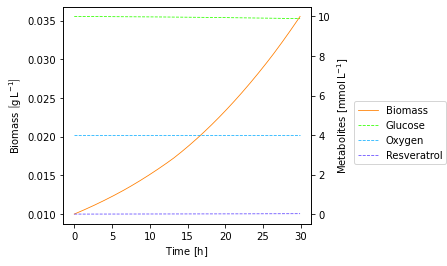

In [23]:
plot_concentrations(concentrations)

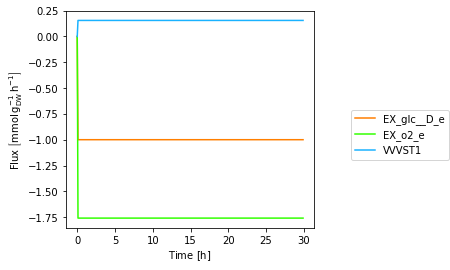

In [24]:
plot_trajectories(trajectories)